## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [6]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


In [25]:
len(df.index)

130

In [27]:
df.shape

(130, 3)

In [11]:
max1=df.temperature.max()
min1=df.temperature.min()

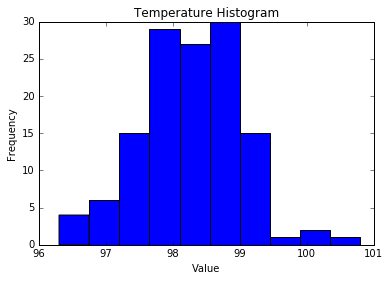

In [21]:
%matplotlib inline 
plt.hist(df.temperature)
plt.title("Temperature Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [23]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

In [36]:
z=(df.temperature.mean()-98.6)*np.sqrt(130)/df.temperature.std()
z


-0.4784196512470687

In [34]:
df.temperature.mean()

98.24923076923078

In [39]:
mean, sigma = np.mean(df.temperature), np.std(df.temperature)

conf_int = stats.norm.interval(0.99, loc=mean, scale=sigma/ np.sqrt(len(df.temperature)))
conf_int

(98.084231864012764, 98.414229674448791)

In [42]:
male=df[df.gender=='M']
female=df[df.gender=='F']

In [43]:
stats.ttest_ind(male.temperature, female.temperature, axis=0, equal_var=True)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)